### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
# I use these three lines of code on top of my each Notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [2]:
# Downloading all necessary Libraries and Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import zipfile
import tensorflow as tf

from google.colab import files
from shutil import  copyfile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Getting the Data**
* I am using Google Colab for this Project, so the act of reading the Data might be different from different platforms. I have used the link below to download the full data of [Dog vs. Cat](https://www.kaggle.com/c/dogs-vs-cats/overview) from [Kaggle](https://www.kaggle.com/). You can manually download the Data from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) as well.

In [3]:
# Loading the Data or Downloading the Data.
# Using Google Colab for reading or loading the Data.
# Uncomment the line below
#!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"


--2020-08-14 07:37:08--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.211.1.18, 2a02:26f0:6b:5a5::e59, 2a02:26f0:6b:5b3::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.211.1.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   176MB/s    in 4.6s    

2020-08-14 07:37:13 (172 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



**Processing the Data**
* The following Python code will use OS library to access the file system and zip file library, allowing you to unzip the file.

In [4]:
# Processing the zip file of the Data
local_zip = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

* Now, Let's find the total number of Cats and Dogs Images in the Data directories.

In [5]:
# Finding the total number of Cats and Dogs images in the directory.
# Total number of Cats.
print(f"Total number of Cats is {len(os.listdir('/tmp/PetImages/Cat/'))}")
# Total number of Dogs.
print(f"Total number of Dogs is {len(os.listdir('/tmp/PetImages/Dog/'))}")

Total number of Cats is 12501
Total number of Dogs is 12501


**Creating new Directories**
* Creating a new directory for cats-vs-dogs and subdirectories for training and validation. These subdirectories will need more subdirectories for cats and dogs.

In [6]:
# Using os.mkdir to create new directories
# Creating new directories for training and validation
try:
  os.mkdir("/tmp/cats-vs-dogs")
  os.mkdir("/tmp/cats-vs-dogs/training")
  os.mkdir("/tmp/cats-vs-dogs/validation")
  os.mkdir("/tmp/cats-vs-dogs/training/Cats")
  os.mkdir("/tmp/cats-vs-dogs/training/Dogs")
  os.mkdir("/tmp/cats-vs-dogs/validation/Cats")
  os.mkdir("/tmp/cats-vs-dogs/validation/Dogs")
except OSError:
  pass

**Splitting the Data into Training and Validation**
* I will write a function which will takes a SOURCE directory containing the files, a TRAINING directory that a portion of files will be copied to, a VALIDATION directory that a portion of files will be copied to, and SPLIT_SIZE to determine the portion. 90% of the Images will be copied into TRAINING directory and remaining 10% of the Images will be copied into VALIDATION directory. Every Images will be checked, if any of the Images has zero file length then they won't be copied over.

In [7]:
# Writing the function which splits the data into Training and Validation or Testing.
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename, "is zero length, so ignoring!")
  
  training_length = int(len(files) * SPLIT_SIZE)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[0:validation_length]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CAT_DIR = "/tmp/cats-vs-dogs/training/Cats/"
VALIDATION_CAT_DIR = "/tmp/cats-vs-dogs/validation/Cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOG_DIR = "/tmp/cats-vs-dogs/training/Dogs/"
VALIDATION_DOG_DIR = "/tmp/cats-vs-dogs/validation/Dogs/"

SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, SPLIT_SIZE)

666.jpg is zero length, so ignoring!
11702.jpg is zero length, so ignoring!


* Finding the total number of Images in Training and Validation Dataset. The Training Dataset has 90% of the total Images present in the directory and Validation Dataset has 10% of the total Images present in the directory.

In [8]:
# Total number of images in Training
print(f"Total number of training Cats is {len(os.listdir('/tmp/cats-vs-dogs/training/Cats/'))}")
print(f"Total number of training Dogs is {len(os.listdir('/tmp/cats-vs-dogs/training/Dogs/'))}")

# Total number of images in Validation
print(f"Total number of validation Cats is {len(os.listdir('/tmp/cats-vs-dogs/validation/Cats/'))}")
print(f"Total number of validation Dogs is {len(os.listdir('/tmp/cats-vs-dogs/validation/Dogs/'))}")

Total number of training Cats is 12494
Total number of training Dogs is 12488
Total number of validation Cats is 3381
Total number of validation Dogs is 3407


* Let's define each of these directories as follows:

In [9]:
# Directory with training cats images
train_cats_dir = os.path.join("/tmp/cats-vs-dogs/training/Cats")

# Directory with training dogs images.
train_dogs_dir = os.path.join("/tmp/cats-vs-dogs/training/Dogs")

# Directory with validation cats images
validation_cats_dir = os.path.join("/tmp/cats-vs-dogs/validation/Cats")

# Directory with validation dogs images
validation_dogs_dir = os.path.join("/tmp/cats-vs-dogs/validation/Dogs")

* Now, Let's look at the filenames in cats and dogs training and validation directories.

In [10]:
# Training Cat directory
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

# Training Dog directory
train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

# Validation Cat directory
validation_cat_names = os.listdir(validation_cats_dir)
print(validation_cat_names[:10])

# Validation Dog directory
validation_dog_names = os.listdir(validation_dogs_dir)
print(validation_dog_names[:10])

['12209.jpg', '6459.jpg', '8659.jpg', '4106.jpg', '667.jpg', '9241.jpg', '7810.jpg', '11206.jpg', '2207.jpg', '5437.jpg']
['12209.jpg', '6459.jpg', '8659.jpg', '4106.jpg', '667.jpg', '9241.jpg', '7810.jpg', '11206.jpg', '2207.jpg', '5437.jpg']
['6459.jpg', '8659.jpg', '9241.jpg', '7810.jpg', '11737.jpg', '2349.jpg', '8346.jpg', '3883.jpg', '3977.jpg', '6025.jpg']
['12209.jpg', '5075.jpg', '9401.jpg', '3883.jpg', '6580.jpg', '3977.jpg', '7622.jpg', '144.jpg', '11008.jpg', '10475.jpg']


**Data Visualization**
* Now, Let's look at the few pictures of the Images to get the sense of how does the Data actually looks like.

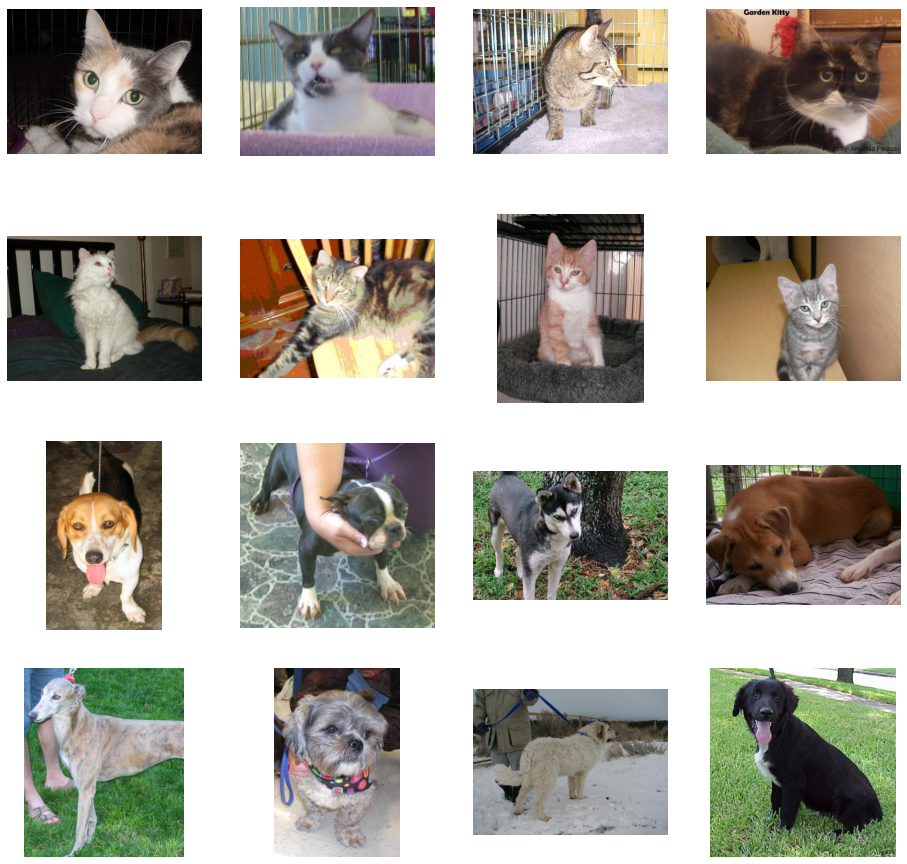

In [11]:
# Parameters for our graph 
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_px = [os.path.join(train_cats_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_px = [os.path.join(train_dogs_dir, fname) for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_px + next_dog_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Convolutional Neural Network : InceptionV3**
* Building Convolutional Neural Network from scratch using Tensorflow and Keras API.
* Using InceptionV3 for the purpose of transfer learning.
* Since it is a two class Classification problem i.e a Binary Classfication problem, I will use sigmoid activation so that the output of my network will be a single scalar between 0 and 1, encodig the probability of the images.

In [12]:
# Creating convolutional neural network with transfer learning.
# Creating the pretrained model
pre_trained_model = InceptionV3(input_shape=(300, 300, 3),
                                weights="imagenet",
                                include_top=False)

# Making all the layers in pretrained model nontrainable
# Freezing all the layers of pretrained model
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Summary of the Model
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

**Processing the Model**
* Working on pretrained model.

In [13]:
# Working on pretrained model.
last_layer = pre_trained_model.get_layer("mixed9")
print(f"The shape of last output layer is {last_layer.output_shape}")
last_output = last_layer.output

The shape of last output layer is (None, 8, 8, 2048)


**Callbacks**
* It stops the further execution of the program when the certain accuracy is achieved. I will build the callbacks which will stop the execution of the program after 99% accuracy is achieved by the model.

In [14]:
# Building the Callbacks 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") > 0.99):
      print("\nReached 99% accurcy so stopping the execution of the program!")
      self.model.stop_training = True

# Instantiation
callbacks = myCallback()

**Processing the Model**
* Preparing the Final Model from pretrained model.

In [15]:
# Processing the Model

# Flatten the output layer of pretrained model into 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Adding fully connected layer with relu activation
x = tf.keras.layers.Dense(units=1024, activation="relu")(x)
# Adding dropout with rate 0.2
x = tf.keras.layers.Dropout(0.2)(x)
# Adding final sigmoid layer for activation
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Preparing the final Model
model = Model(pre_trained_model.input, x)

* Next, I will configure the specifications for model training. I will train the model with binary_crossentropy loss, because it is a binary classification problem and the activation is sigmoid.
* Here, I will be using RMSprop which is preferable for Stochastic Gradient Descent because RMSprop automates learning rate tuning for us.

In [16]:
# Compile the Model
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.0001),
              metrics=["accuracy"])

* Let's look at the summary of the Neural Network.

In [17]:
# Summary of Neural Network
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

**Data Processing**
* I will process our images by normalizing pixel values in range of [0, 1] which is originally in range of [0, 255]

In [18]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/tmp/cats-vs-dogs/training",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/tmp/cats-vs-dogs/validation",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 24980 images belonging to 2 classes.
Found 6787 images belonging to 2 classes.


### **Training the Model**
* I will train the Model for 100 epochs and 8 epoch per steps.
* The Loss and Accuracy are the great indication of the progress of training. It's making a guess to the classification of the training data and then measuring it against the known label calculating the result. Accuracy is the portion of the correct guesses.

In [19]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=50,
    verbose=2,
    validation_data=validation_generator,
    validation_steps=8,
    callbacks=[callbacks]
)

Epoch 1/50
8/8 - 27s - loss: 1.5845 - accuracy: 0.8018 - val_loss: 0.0723 - val_accuracy: 0.9844
Epoch 2/50
8/8 - 26s - loss: 0.0757 - accuracy: 0.9756 - val_loss: 0.0355 - val_accuracy: 0.9922
Epoch 3/50
8/8 - 27s - loss: 0.1465 - accuracy: 0.9531 - val_loss: 0.0358 - val_accuracy: 0.9922
Epoch 4/50
8/8 - 27s - loss: 0.0515 - accuracy: 0.9814 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 5/50
8/8 - 27s - loss: 0.0758 - accuracy: 0.9697 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 6/50
8/8 - 26s - loss: 0.0461 - accuracy: 0.9824 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 7/50
8/8 - 26s - loss: 0.1034 - accuracy: 0.9688 - val_loss: 0.0179 - val_accuracy: 0.9922
Epoch 8/50
8/8 - 26s - loss: 0.0437 - accuracy: 0.9824 - val_loss: 0.0165 - val_accuracy: 0.9883
Epoch 9/50
8/8 - 26s - loss: 0.0642 - accuracy: 0.9805 - val_loss: 0.0391 - val_accuracy: 0.9766
Epoch 10/50
8/8 - 26s - loss: 0.0691 - accuracy: 0.9785 - val_loss: 0.0176 - val_accuracy: 0.9961
Epoch 11/50
8/8 - 26s - loss:

**Model Visualization**
* Plotting Loss vs Accuracy

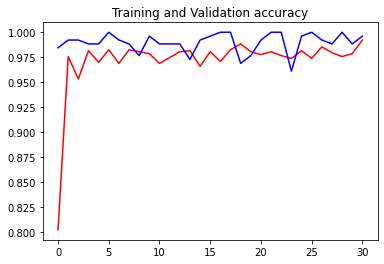

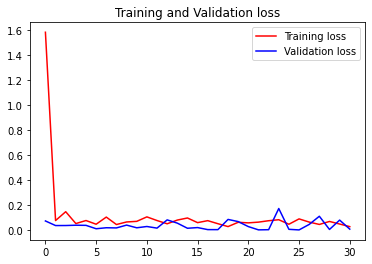

In [20]:
# Plotting loss vs accuracy

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

**Model in Production**
* Now, Let's look at actually running a prediction using our model. The code below will allow you to choose 1 or more files from your file system. It will then upload and run the model and give indication wheather the object is cat or a dog.

In [21]:
# Model in production
# Using google colab file system
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0]) 
  if classes[0] > 0.5:
    print(fn, "is a Dog")
  else:
    print(fn, "is a Cat")

Saving download.jpg to download.jpg
[1.]
download.jpg is a Dog
